In [1]:
import os
import sys
import sv as SV
import numpy as np 
import pylab as pl
import astropy.table as atable
import astropy.io.fits as fits

from   tqdm.notebook import tqdm, trange

# 21.7e version for Everest. 
from   desispec.tsnr import tsnr2_to_efftime

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
all_exps = SV.info_exposures(release='everest')

In [4]:
in_bright = (all_exps['FAPRGRM'] == 'bgsmws') | (all_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = all_exps[(all_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = all_exps[(all_exps['SURVEY'] == 'sv3') & in_bright]
main_exps = all_exps[(all_exps['SURVEY'] == 'main') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))
print('%i MAIN BRIGHT exposure' % len(main_exps))

1418 exposures in BRIGHT
635 SV1 BRIGHT exposure
298 SV3 BRIGHT exposure
409 MAIN BRIGHT exposure


In [25]:
sv1_exps

<Table length=635>
 NIGHT   EXPID TILEID ... EFFTIME_BRIGHT_GFA EFFTIME_BACKUP_GFA
 int32   int32 int32  ...      float64            float64      
-------- ----- ------ ... ------------------ ------------------
20201218 68619  80617 ... 140.28784450165057 148.93183070429475
20201218 68644  80612 ...  164.1901775248753 175.86648702351312
20201218 68645  80612 ... 156.72063643780757  169.5877371966596
20201218 68646  80612 ...  127.8182672762051 126.56921469634099
20201218 68657  80613 ...  244.6203227675448  307.8473475450303
20201218 68658  80613 ...  239.4289205308351  299.6920937910984
20201218 68659  80613 ... 216.58690119600817 267.56098488219544
20201218 68672  80619 ...  213.4449205333816  269.0919935083795
20201218 68673  80619 ... 199.83906509035646 246.72919232932492
20201218 68674  80619 ... 189.39857106369797 231.39700863199283
     ...   ...    ... ...                ...                ...
20210328 82605  80618 ...   167.687872596741 251.48121799192643
20210328 82614  80740 ... 11.932111487644036 11.411695505111066
20210328 82621  80651 ... 55.980163155053816  55.61322104484943
20210328 82624  80742 ...  43.66142253373815  48.83020819539124
20210331 82832  80614 ... 183.51297831158791  289.5792105115197
20210331 82835  80657 ... 177.50766613705966 251.51754415981273
20210331 82836  80657 ... 208.01582933104604  318.1366418493934
20210331 82839  80652 ...  193.3256783806698  265.5570931801799
20210402 83168  80666 ... 175.99653097518566  271.7168519668911
20210402 83172  80664 ...  88.01625671549293 145.34042743352165

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$N_{\\rm exp}$')

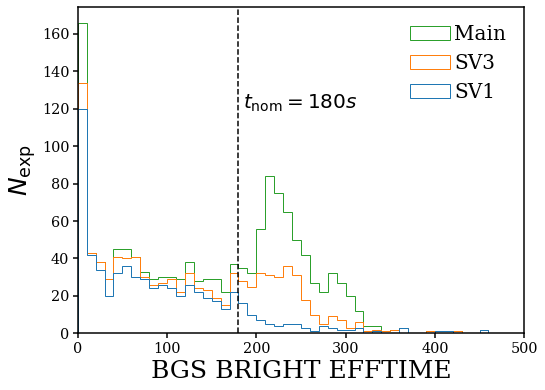

In [5]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_   = sub.hist([sv1_exps['BGS_EFFTIME_BRIGHT'], sv3_exps['BGS_EFFTIME_BRIGHT'], main_exps['BGS_EFFTIME_BRIGHT']], range=(0., 500), bins=50, stacked=True, label=['SV1', 'SV3', 'Main'], histtype='step')

sub.axvline(180, color='k', linestyle='--')
sub.text(185, 120, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'BGS BRIGHT EFFTIME', fontsize=25)
sub.set_xlim(0., 500)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)

In [6]:
def compile_rr(exps, survey): 
    gals = [] 
    for i in trange(len(exps)): 
        try: 
            _gals = SV.get_zbest_exp(exps['TILEID'][i], exps['EXPID'][i], release='everest', survey=survey, ext_cols=[], exp_dX2=40.)
        except AssertionError: 
            continue 
        gals.append(_gals)
    return atable.vstack(gals)

In [7]:
near_nom = (sv1_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv1_exps['BGS_EFFTIME_BRIGHT'] < 200)

sv1_exps[near_nom]

<Table length=61>
 NIGHT   EXPID TILEID ... EFFTIME_BRIGHT_GFA EFFTIME_BACKUP_GFA
 int32   int32 int32  ...      float64            float64      
-------- ----- ------ ... ------------------ ------------------
20201218 68644  80612 ...  164.1901775248753 175.86648702351312
20201218 68645  80612 ... 156.72063643780757  169.5877371966596
20201218 68672  80619 ...  213.4449205333816  269.0919935083795
20201218 68673  80619 ... 199.83906509035646 246.72919232932492
20201219 68801  80617 ... 167.84999740501974 201.30790036363894
20201221 69227  80613 ... 149.41166643752703 227.65416689280568
20210103 70700  80629 ... 196.75815133991495 243.68873318415186
20210103 70729  80641 ...  115.6613634340186  183.3180781007135
20210103 70730  80641 ... 124.27454826895993  202.5320456511418
20210103 70731  80642 ... 131.19503573655933 213.82004514713967
     ...   ...    ... ...                ...                ...
20210220 77223  80659 ...                0.0                0.0
20210221 77382  80663 ...  181.3812645459343 168.90284681681416
20210221 77383  80663 ... 216.46272392322155 203.87669818061985
20210221 77384  80663 ... 210.23788938316204   190.733918517105
20210306 79554  80741 ... 168.30207747243637 196.05838849386126
20210309 79881  80652 ... 174.31955818193268 198.13022151686204
20210309 79882  80652 ... 177.74560435681119 209.08178119325908
20210331 82832  80614 ... 183.51297831158791  289.5792105115197
20210331 82839  80652 ...  193.3256783806698  265.5570931801799
20210402 83168  80666 ... 175.99653097518566  271.7168519668911

In [8]:
sv1_gals = compile_rr(sv1_exps[near_nom], survey='sv1')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

In [9]:
sv1_gals['EFFTIME_ETC'].data

array([  0.     ,   0.     ,   0.     , ..., 161.87605, 161.87605,
       161.87605], dtype=float32)

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV1')

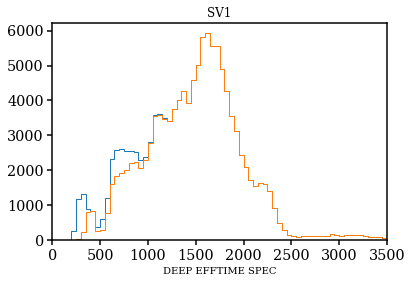

In [10]:
_ = pl.hist(tsnr2_to_efftime(sv1_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e4, 50.), histtype='step')
_ = pl.hist(tsnr2_to_efftime(sv1_gals['DEEP_TSNR2_BGS'][sv1_gals['DEEP_EXPTIME'] > 2000.], 'bgs'), bins=np.arange(0.0, 1.e4, 50.), histtype='step')

pl.xlim(0.0, 3.5e3)
pl.xlabel('DEEP EFFTIME SPEC')

pl.title('SV1')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV1')

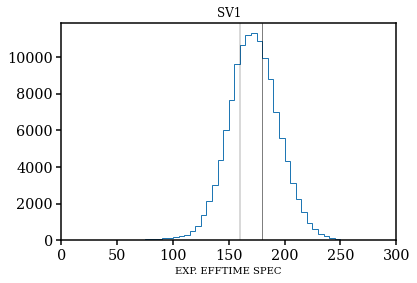

In [11]:
_ = pl.hist(tsnr2_to_efftime(sv1_gals['TSNR2_BGS'].data, 'bgs'), bins=np.arange(0.0, 4.e2, 5.), histtype='step')

pl.xlim(0.0, 300.)

pl.axvline(180., c='k', lw=0.5)
pl.axvline(160., c='k', lw=0.3)

pl.xlabel('EXP. EFFTIME SPEC')

pl.title('SV1')

In [13]:
near_nom = (sv3_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv3_exps['BGS_EFFTIME_BRIGHT'] < 200)

print('%i SV3 exposures near nominal' % np.sum(near_nom))

sv3_gals = compile_rr(sv3_exps[near_nom], survey='sv3')

39 SV3 exposures near nominal


INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV3')

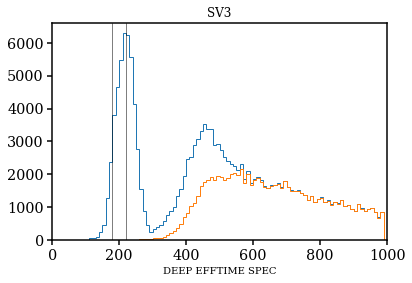

In [14]:
_ = pl.hist(tsnr2_to_efftime(sv3_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')
_ = pl.hist(tsnr2_to_efftime(sv3_gals['DEEP_TSNR2_BGS'], 'bgs')[sv3_gals['DEEP_NUMEXP'] > 2], bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('DEEP EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('SV3')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV3')

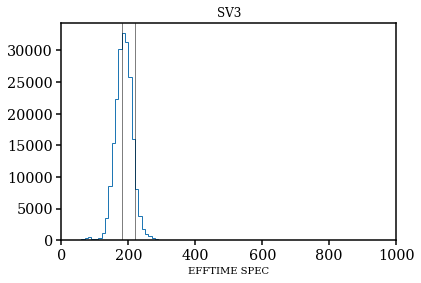

In [15]:
_ = pl.hist(tsnr2_to_efftime(sv3_gals['TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('SV3')

Text(0.5, 1.0, 'SV3')

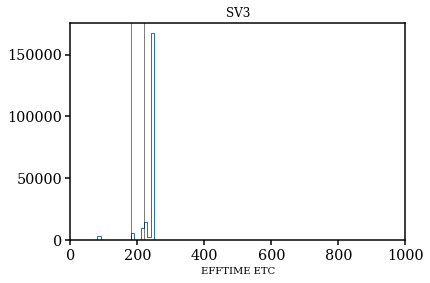

In [19]:
_ = pl.hist(sv3_gals['EFFTIME_ETC'], bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME ETC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('SV3')

In [17]:
near_nom = (main_exps['BGS_EFFTIME_BRIGHT'] > 160) & (main_exps['BGS_EFFTIME_BRIGHT'] < 200)

print('%i MAIN exposures near nominal' % np.sum(near_nom))

main_gals = compile_rr(main_exps[near_nom], survey='main')

26 MAIN exposures near nominal


INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'MAIN')

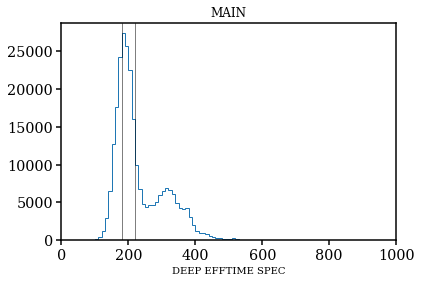

In [20]:
_ = pl.hist(tsnr2_to_efftime(main_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('DEEP EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('MAIN')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'MAIN')

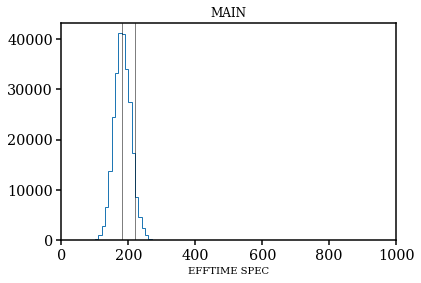

In [21]:
_ = pl.hist(tsnr2_to_efftime(main_gals['TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('MAIN')

Text(0.5, 1.0, 'MAIN')

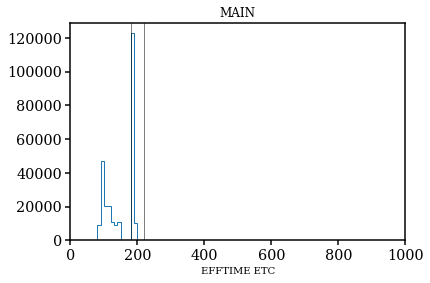

In [22]:
_ = pl.hist(main_gals['EFFTIME_ETC'], bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME ETC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('MAIN')

Text(0.5, 1.0, 'MAIN')

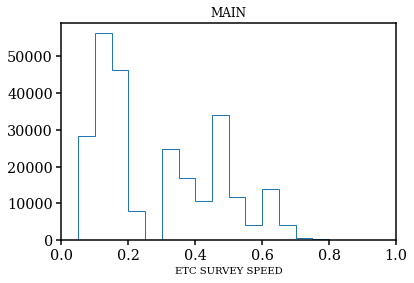

In [24]:
_ = pl.hist(main_gals['ETC_SURVEY_SPEED'], bins=np.arange(0.0, 1., 0.05), histtype='step')

pl.xlim(0.0, 1.)
pl.xlabel('ETC SURVEY SPEED')
pl.title('MAIN')

In [23]:
# save compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'

sv1_gals.write(os.path.join(dat_dir,  'sv1.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)
sv3_gals.write(os.path.join(dat_dir,  'sv3.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)
main_gals.write(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)

# Done.